In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [2]:
train=pd.read_csv("logistic_traindata.txt",sep=" ")
x_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1:].values
test=pd.read_csv("logistic_testdata.txt",sep=" ")
x_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1:].values 
 
  

In [24]:
x_train

array([[0.346, 0.78 ],
       [0.303, 0.439],
       [0.358, 0.729],
       [0.602, 0.863],
       [0.79 , 0.753],
       [0.611, 0.965]])

In [25]:
x_test

array([[0.959, 0.382],
       [0.75 , 0.306],
       [0.395, 0.76 ],
       [0.823, 0.764],
       [0.761, 0.874],
       [0.844, 0.435]])

In [26]:
y_train

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [27]:
y_test

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

# 5-a

In [17]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [18]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [19]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grad = {"dw": dw, "db": db}
    
    return grad, cost


In [9]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    W=[]
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            W.append(w[0][0])
           
    plt.plot(W,costs)
    plt.show()

    
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs,W

In [10]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred


Number of Features 2


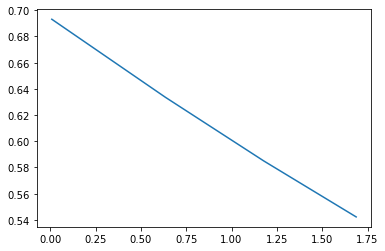

Optimized weights [[2.16160425 0.71079827]]
Optimized intercept -1.4763538244350112
Training Accuracy 1.0
Test Accuracy 0.6666666666666666


In [12]:
n_features = x_train.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
coeff, gradient, costs,W = model_predict(w, b, x_train, y_train, learning_rate=0.1,no_iterations=400)
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

final_train_pred = sigmoid_activation(np.dot(w,x_train.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,x_test.T)+b)

m_tr =  x_train.shape[0]
m_ts =  x_test.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_train))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_train))

# 5-b

In [21]:
w=[1.5,0.5]
b=-1
logistic_model = sigmoid_activation(np.dot(w,x_train.T)+b)
print(logistic_model)

[0.47726569 0.4192142  0.47539489 0.58285389 0.63679954 0.59844738]


In [22]:
#Cross-entropy error function
w=[1.5,0.5]
b=-1
m=x_train.shape[0]
cost = (-1/m)*(np.sum((y_train*np.log(logistic_model)) + ((1-y_train)*(np.log(1-logistic_model)))))
print(cost)

4.24695047852859


### 5b)Use gradient descent to update θ0, θ1, θ2 for one iteration. Write down the updated logistic regression model.

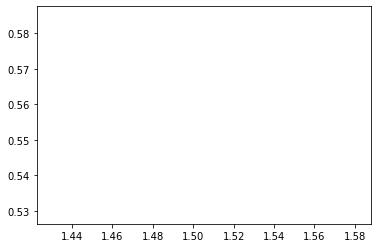

Optimized weights [[1.50535086 0.50196867]]
Optimized intercept -1.0031662597725644
Training Accuracy 1.0
Test Accuracy 0.6666666666666666


In [15]:
w=[1.5,0.5]
b=-1
from sklearn.metrics import accuracy_score
n_features = x_train.shape[1]
coeff, gradient, costs,W = model_predict(w, b, x_train, y_train, learning_rate=0.1,no_iterations=1)
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

final_train_pred = sigmoid_activation(np.dot(w,x_train.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,x_test.T)+b)

m_tr =  x_train.shape[0]
m_ts =  x_test.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_train))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_train))

# 5-c

Number of Features 2


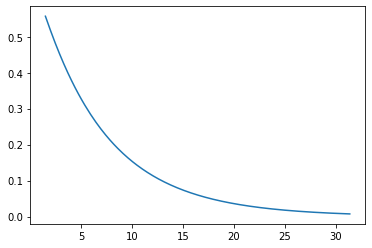

Optimized weights [[31.36347263  7.53262099]]
Optimized intercept -21.190551572578155
Training Accuracy 1.0
Test Accuracy 0.6666666666666666
precision 0.6
recall 1.0


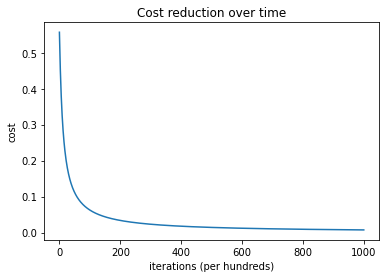

In [16]:
w=[1.5,0.5]
b=-1


n_features = x_train.shape[1]
print('Number of Features', n_features)

coeff, gradient, costs,W = model_predict(w, b, x_train, y_train, learning_rate=0.1,no_iterations=100000)

w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

final_train_pred = sigmoid_activation(np.dot(w,x_train.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,x_test.T)+b)

m_tr =  x_train.shape[0]
m_ts =  x_test.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_train))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_train))
print('precision',precision_score(y_test,y_ts_pred.T))
print('recall',recall_score(y_test,y_ts_pred.T))

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()